# 1- Colab Setup

In [ ]:
! pip install -r requirements.txt

Importing Data from Kaggle

In [1]:
from google.colab import files
files.upload()

! pip install -q kaggle
! mkdir ~/.kaggle # making new directory
! cp kaggle.json ~/.kaggle/ # copying kaggle json file to the created directory
! chmod 600 ~/.kaggle/kaggle.json # changing the permissions
! kaggle datasets download -d sgpjesus/bank-account-fraud-dataset-neurips-2022 # downloading the dataset
! mkdir data # making new directory on colab session to unzip the dataset in it
! unzip -q bank-account-fraud-dataset-neurips-2022.zip -d data # unzipping the downloaded data

Saving kaggle.json to kaggle.json
 99% 543M/546M [00:05<00:00, 74.6MB/s]
100% 546M/546M [00:05<00:00, 106MB/s] 


# 2- Loading the Classes

In [2]:
from data_cleaning import *
from modeling import *
from preprocessing import *
from nn_modeling import *

# 3- Reading the data and performing general data cleaning

* Duplicate Values Checking
* Null Values Checking
* Outliers Checking

Create an instance of the "data cleaning" class to be able to perfrom verious defined functions.

Basic functionality done automatically by instatiating the "data_cleaning" class includes:

* Dropping "device_fraud_count" feature
* Adjusting the datatype of some features to be categorical


In [3]:
df=data_cleaning('/content/data/Base.csv')

In [4]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


Checking if there are any duplicates

In [5]:
df.check_duplicates()

'this data has no duplicates'

Checking data statistics

In [6]:
df.describe(flag='numerical')

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,16.718568,86.587867,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,10.839303,515.851010,7.544940,3.288674
std,0.289125,44.046230,88.406599,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,12.116875,487.559902,8.033106,2.209994
min,0.000001,-1.000000,-1.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,-1.000000,190.000000,-1.000000,0.000000
1%,0.021672,-1.000000,0.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,-1.000000,200.000000,0.651256,0.000000
25%,0.225216,-1.000000,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,-1.000000,200.000000,3.103053,1.000000
50%,0.492153,-1.000000,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,5.000000,200.000000,5.114321,3.000000
75%,0.755567,12.000000,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,25.000000,500.000000,8.866131,5.000000
99%,0.997470,231.000000,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,31.000000,1500.000000,44.552828,7.000000
max,0.999999,383.000000,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,32.000000,2100.000000,85.899143,7.000000


In [7]:
df.describe(flag='categorical')

,fraud_bool,income,customer_age,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w
count,1000000,1000000.0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,9.0,9,5,7,2,7,2,2,2,2,2,5,2,4
top,0,0.9,30,AB,CA,1,BC,0,1,0,0,INTERNET,other,1,1
freq,988971,221419.0,311433,370554,730252,529886,372143,582923,889676,777012,974758,992952,342728,576947,968067


In [8]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  category
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  category
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

## Checking the nulls

Since the null values in the dataset are -1 they were not shown by using df.info() method so we will check them using our defined method of the preprocessing class

In [9]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


Replace the -1 value with an actual Null and return the null counts

In [10]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

<AxesSubplot: >

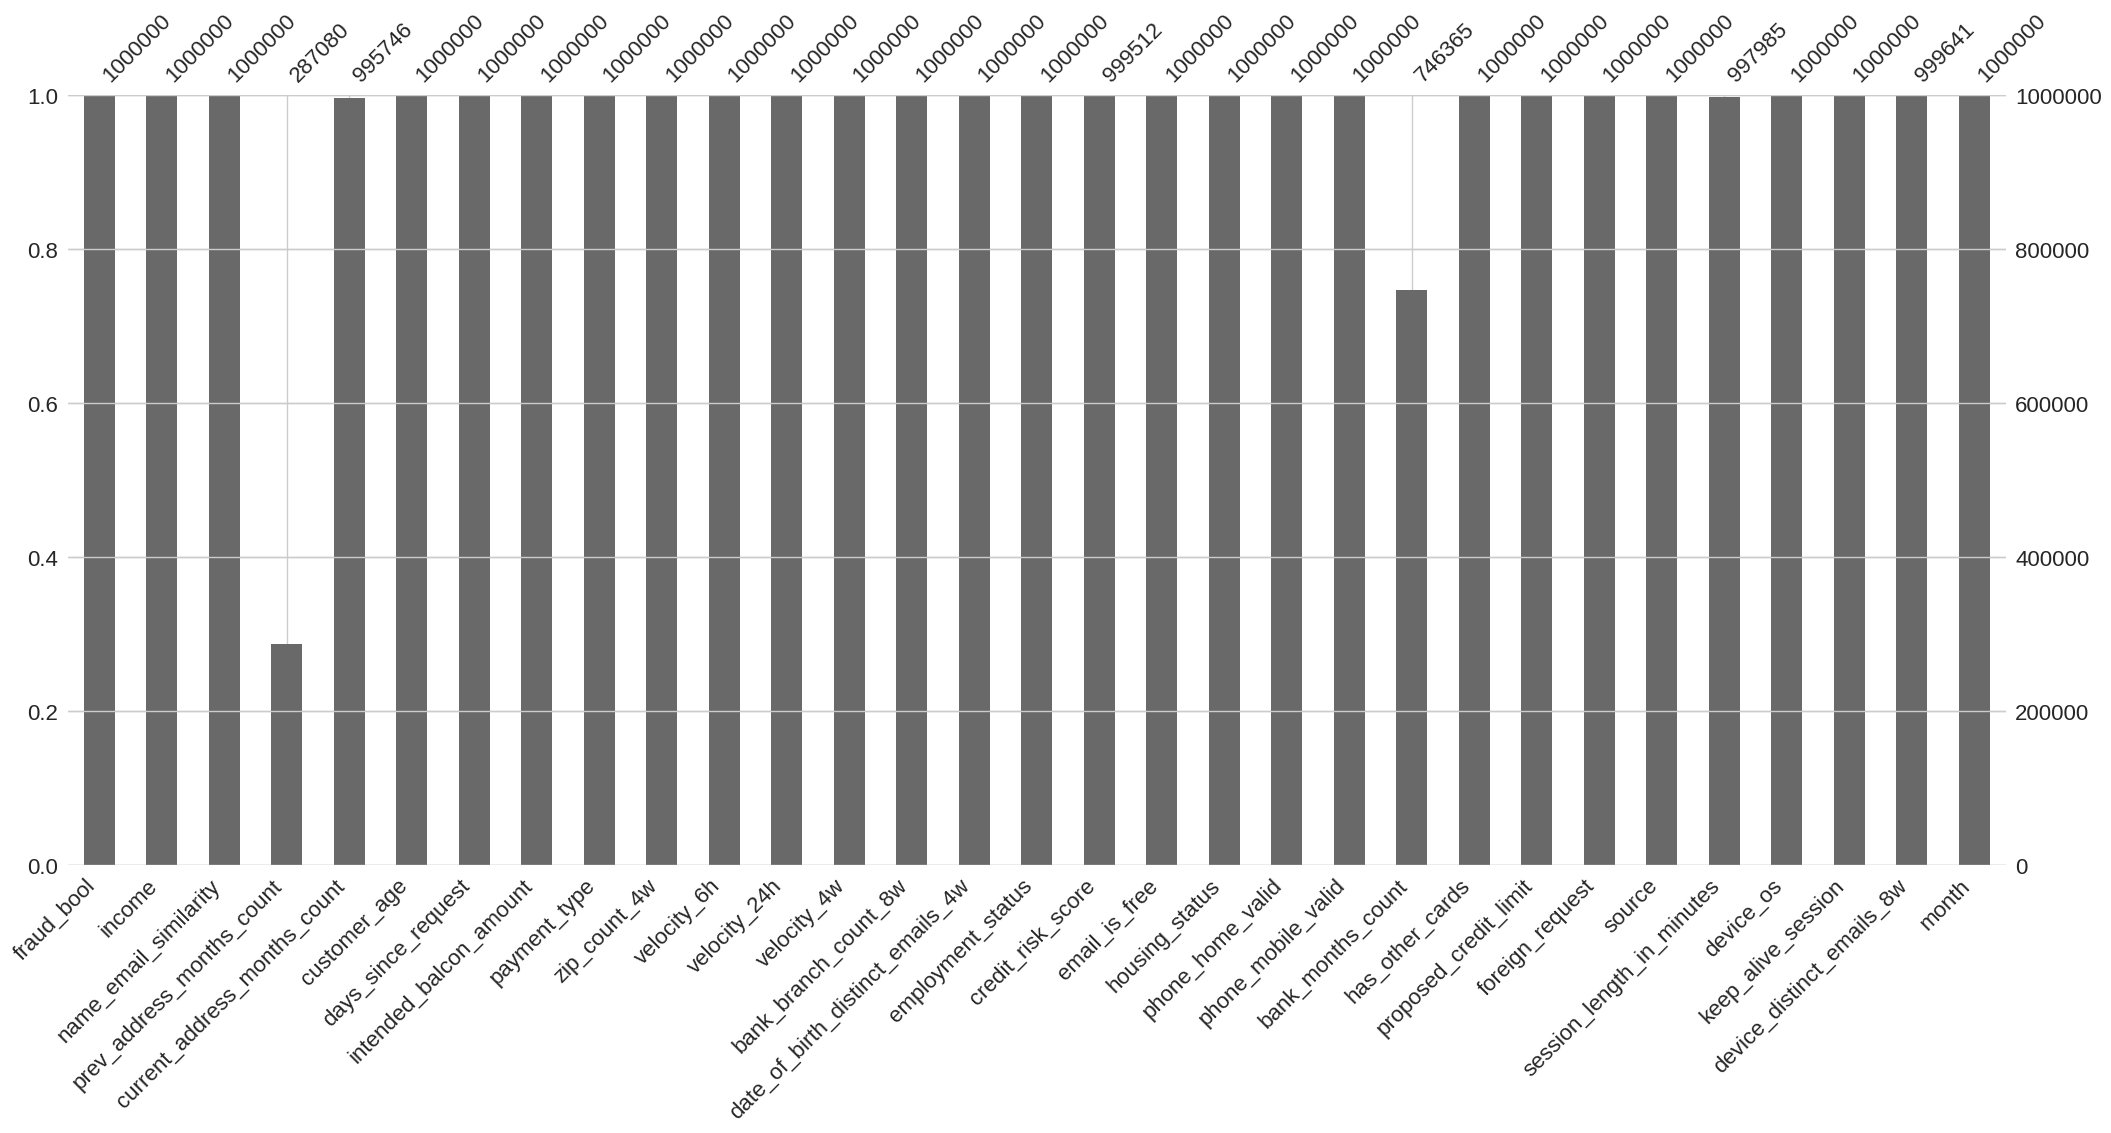

In [11]:
msno.bar(df.data)

<AxesSubplot: >

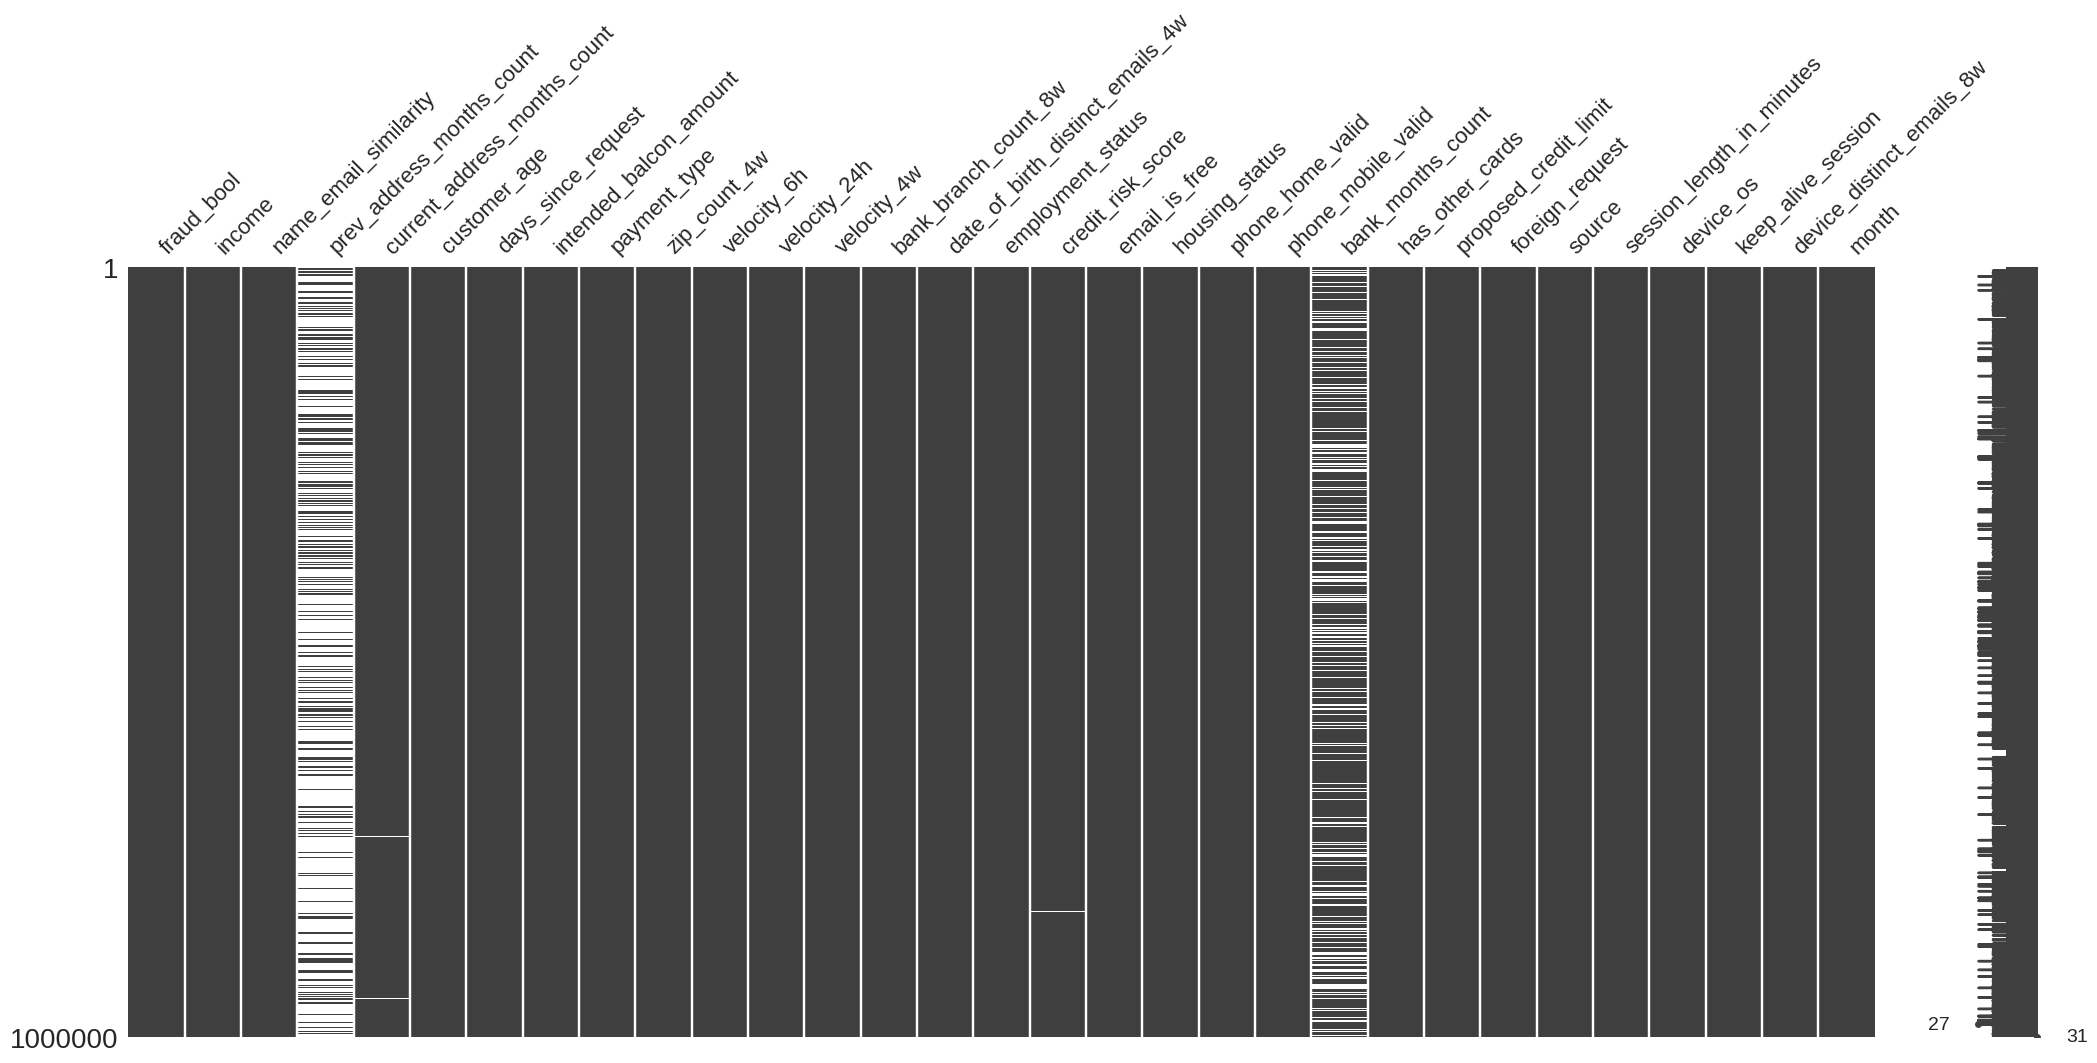

In [12]:
msno.matrix(df.data)

### Handling the nulls:


Since the below features have alot of missing values trying to impute them can bias the results so for this current trial we'll drop both of the columns
* prev_address_months_count
* bank_months_count

For other columns that have missing values we'll impute them.

In [13]:
df.delete_columns(['prev_address_months_count',
                   'bank_months_count'])

'Columns prev_address_months_count, bank_months_count deleted successfully.'

Missing values imputation for the rest of features
* Null values of numerical features are replaced by their mean
* Null values of the categorical features are replace by the most repeated value

In [14]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mean(),inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

## Checking Multicollinearity:
 - Correlation matrix

We can check for highly correlated features (~0.80) and try to drop them to handle the multicolinearity if exists but from below correlation matrcies of both numerical and categorical features there is no correlation above the threshold so we will not drop any features.

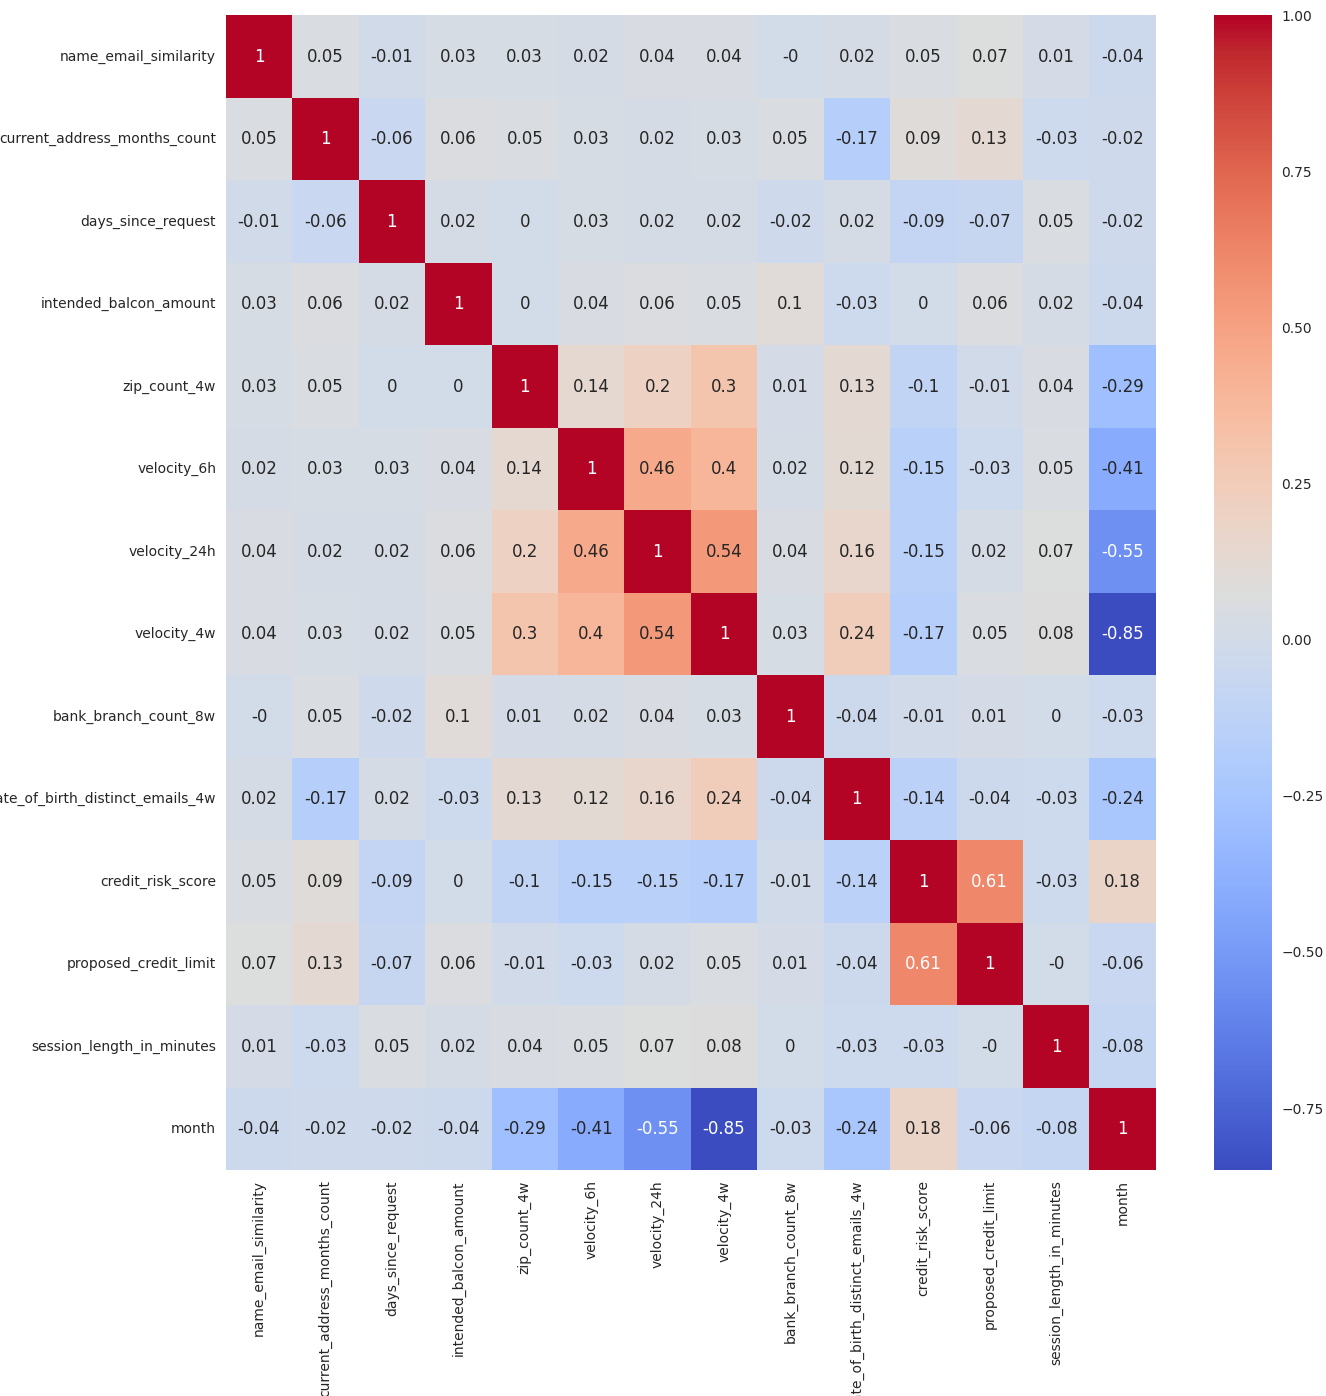

In [15]:
df.plot_corr_heatmap()

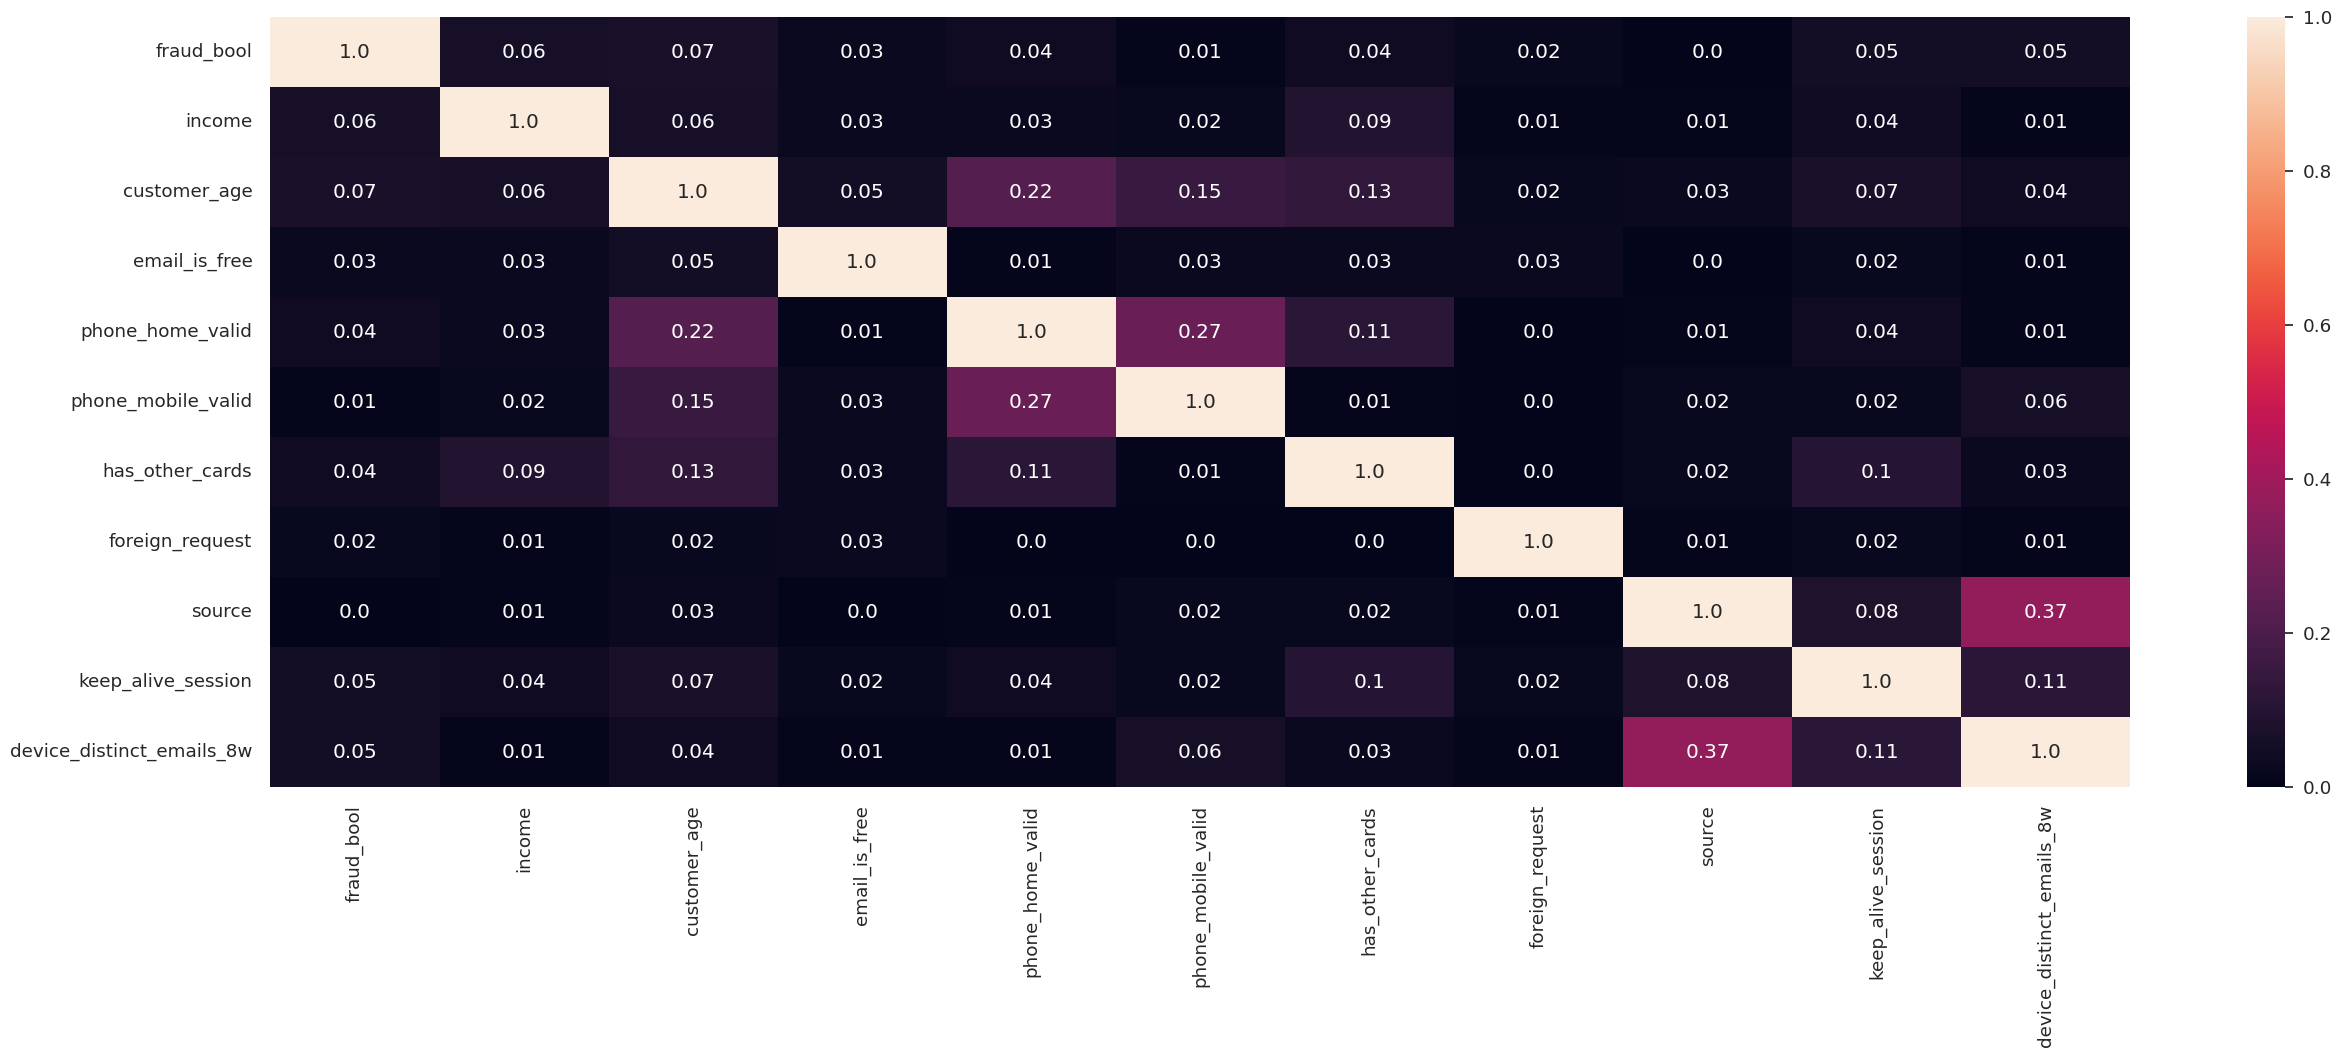

In [16]:
df.plot_cramer()

## Checking the Outliers

Check the skewness for the numerical values, any skewness value above 1 means that the feature is not normally distributed and therefore there is a possibility for outliers

velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.387206
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


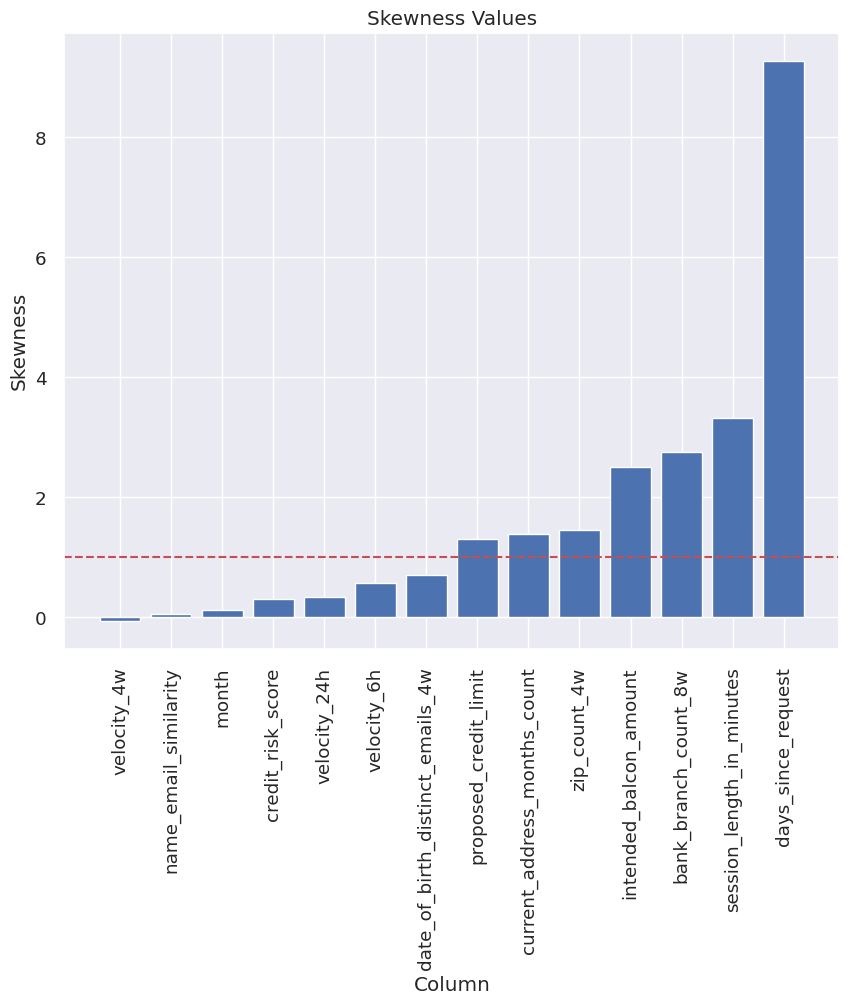

In [17]:
# printing the skewness sorted and plotting a bar chart
# and skewed features exceeding the threshold of 1 will be returned
skewed_columns=df.draw_skewness_barchart()

### Handle the outliers:

Applying the log transform of skewed features exceeding threshold of 1

In [18]:
for column in skewed_columns:
    if column =='intended_balcon_amount': # skip it for now
        continue
    print(df.apply_log_transform(column))

Log transform applied to column 'current_address_months_count' successfully.
Log transform applied to column 'days_since_request' successfully.
Log transform applied to column 'zip_count_4w' successfully.
Log transform applied to column 'bank_branch_count_8w' successfully.
Log transform applied to column 'proposed_credit_limit' successfully.
Log transform applied to column 'session_length_in_minutes' successfully.


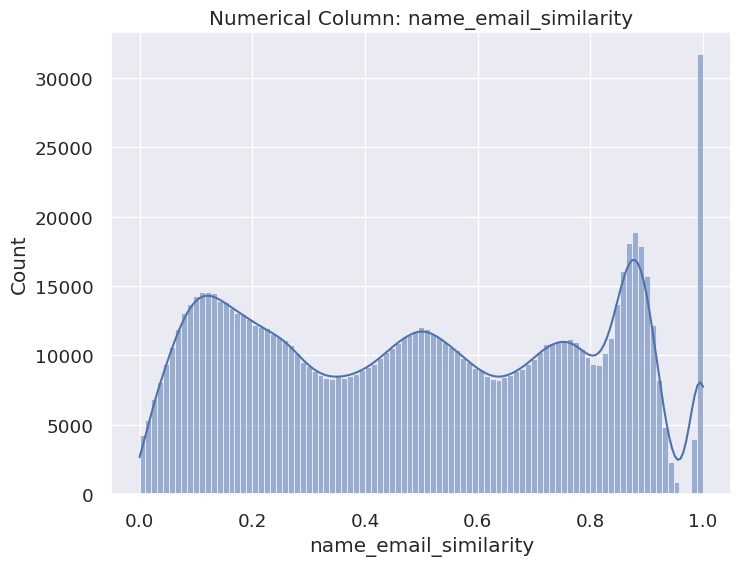

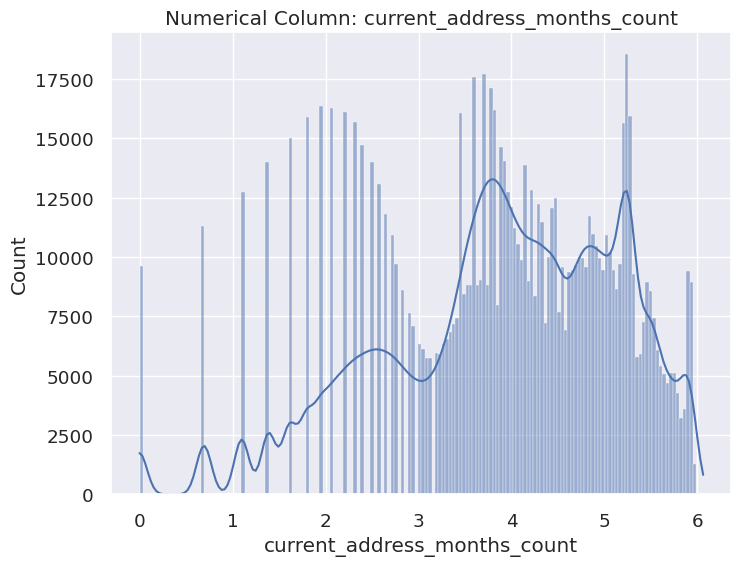

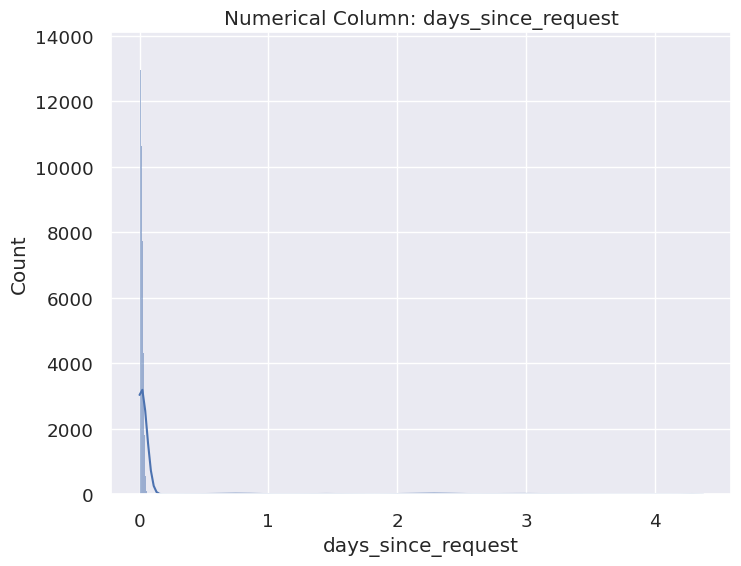

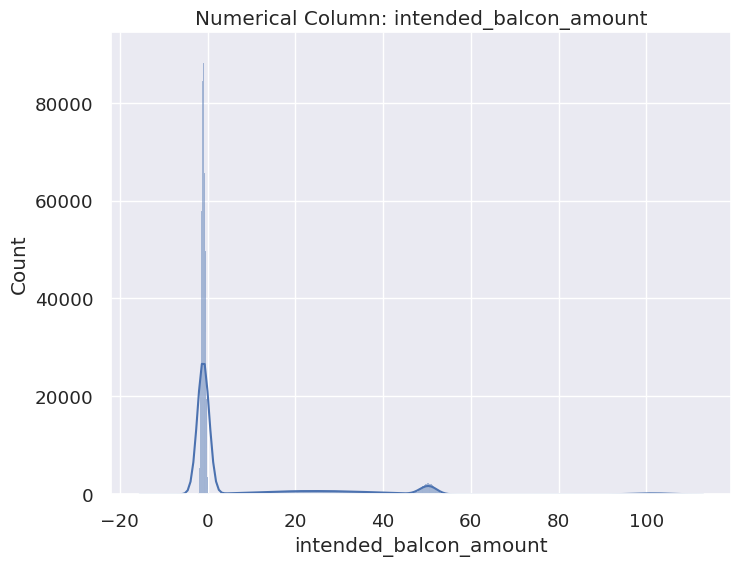

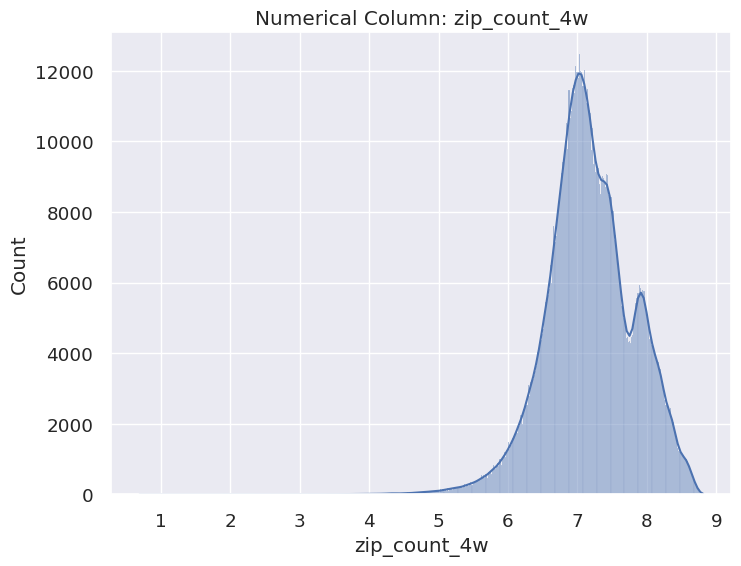

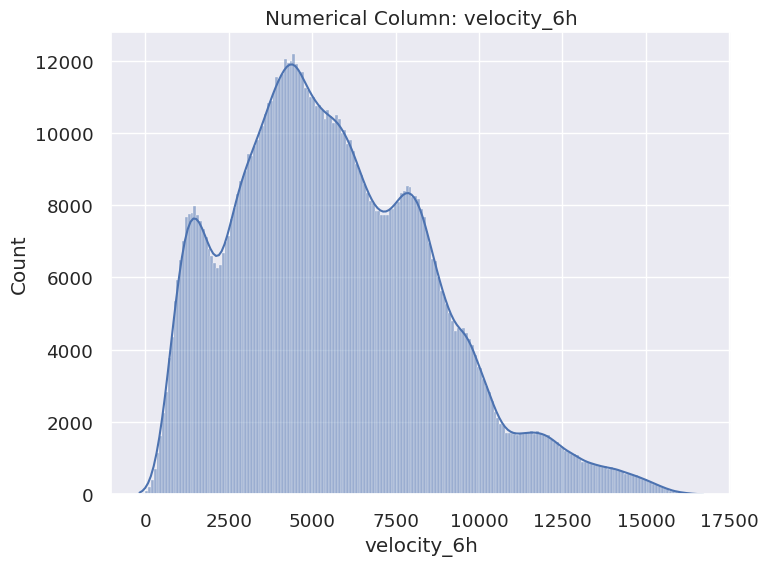

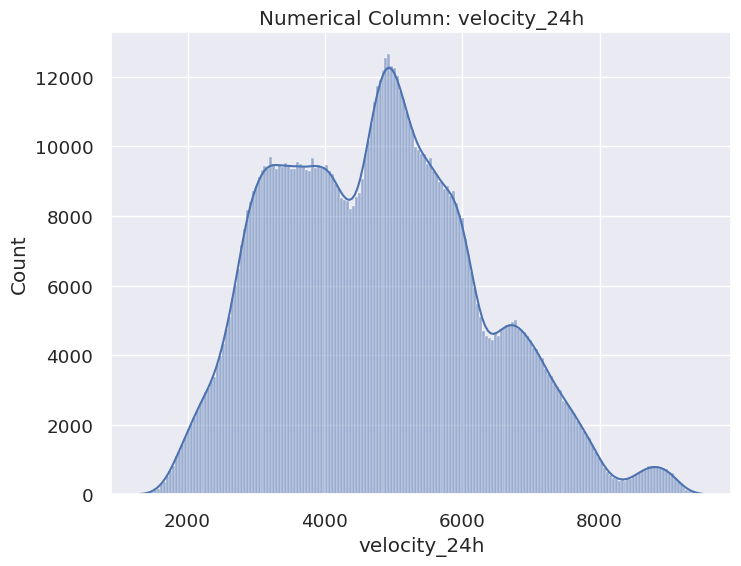

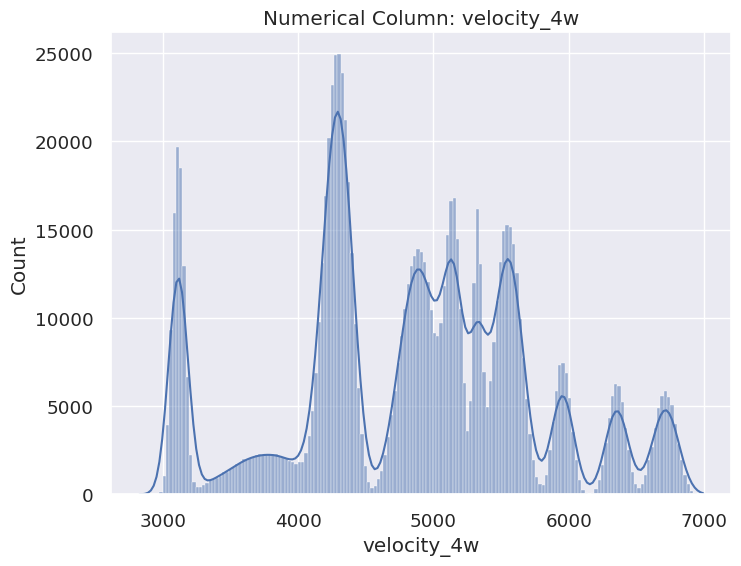

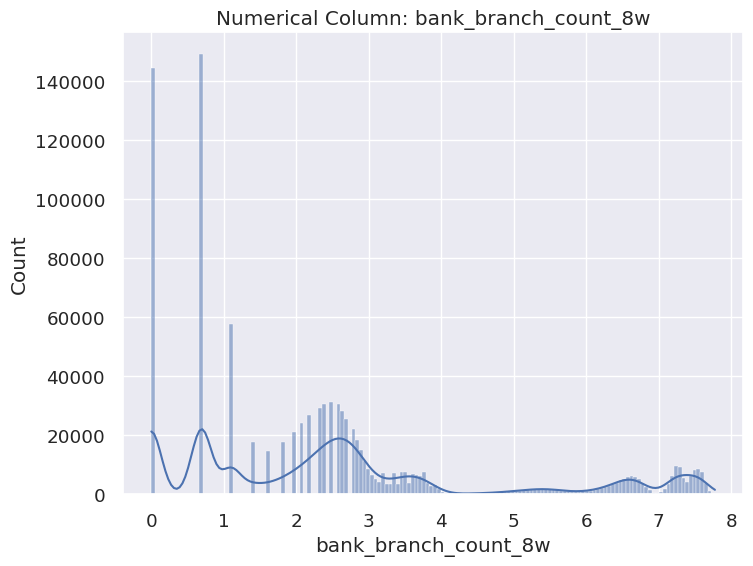

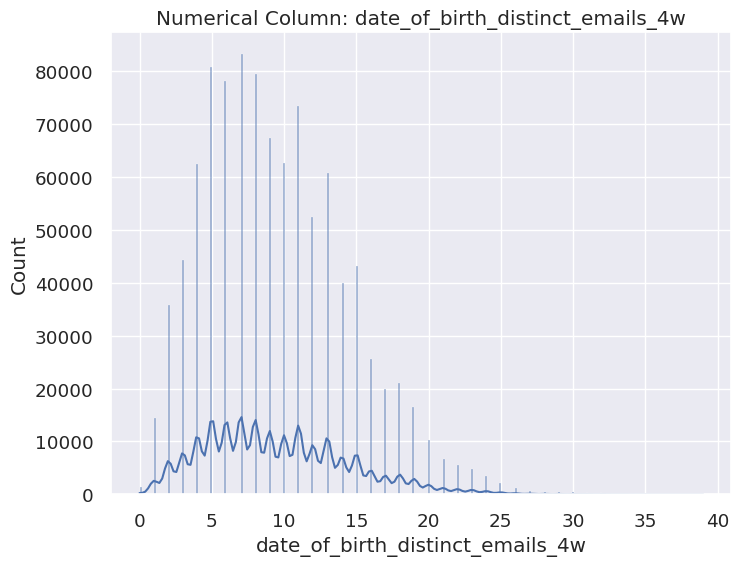

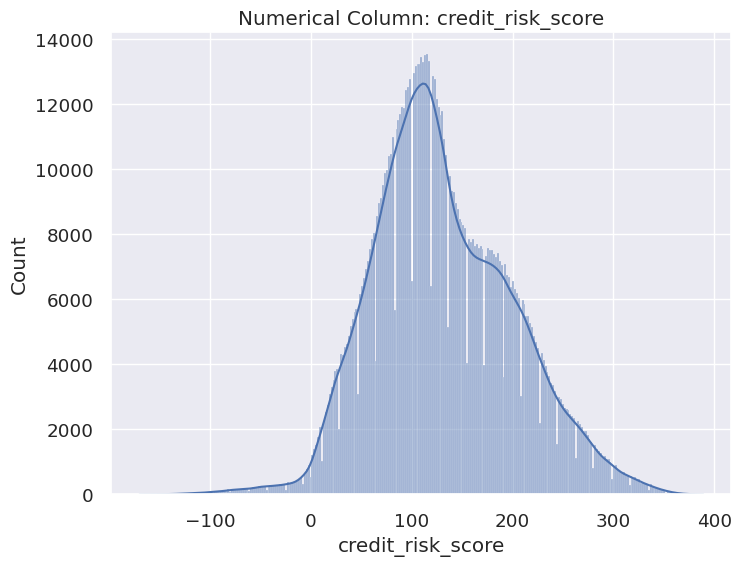

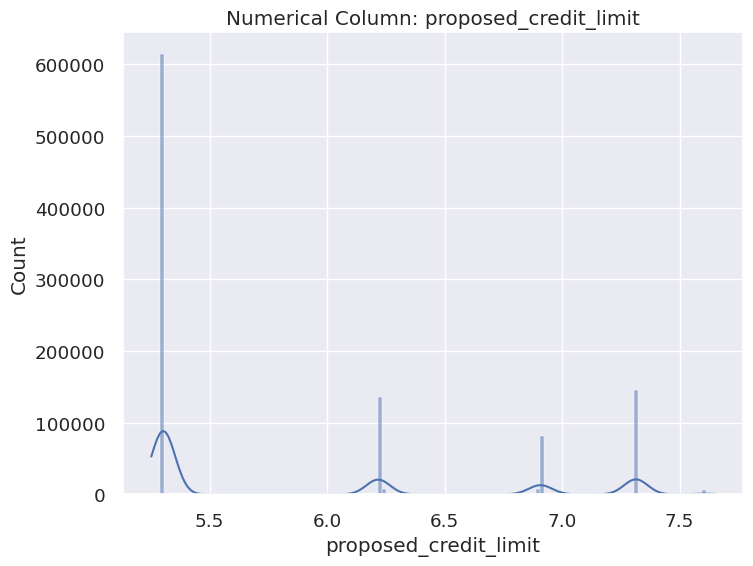

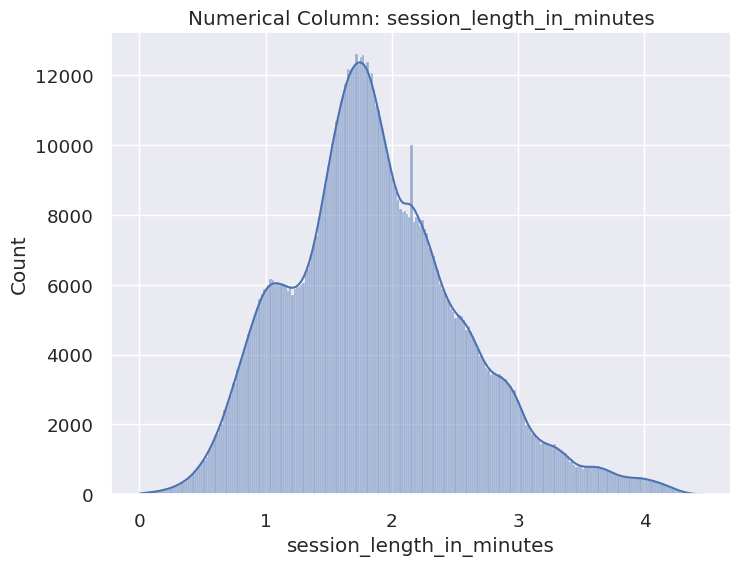

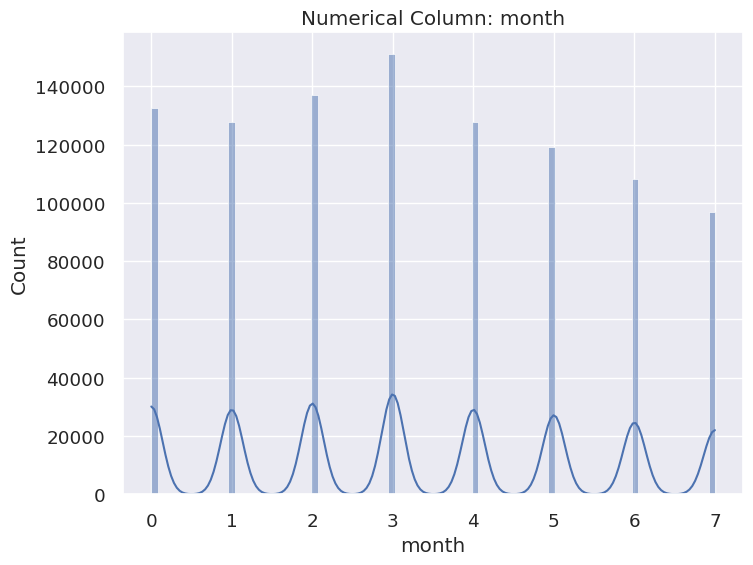

In [19]:
df.plot_numerical_columns()

In [20]:
#df.plot_categorical_columns()
#df.describe(flag='numerical')

In [21]:
# get columns containing the outliers
# for normaly distributed features outliers will be identified using z-score
# for features that are not normally distributed will use the percentiles to determine them
column_with_outliers=df.find_numerical_columns_with_possible_outliers()

In [22]:
# removing the outliers from the dataset
df.handle_outliers(column_with_outliers, method='delete')

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,4.488636,50,0.020709,-1.331345,AA,6.646391,10650.765523,...,0,0,6.216606,0,INTERNET,1.586807,windows,0,1,7
5,1,0.3,0.143921,3.433987,30,0.027839,-0.748282,AD,6.597146,3223.248406,...,1,0,5.303305,0,INTERNET,1.760453,windows,0,1,7
6,1,0.7,0.321554,5.030438,30,0.030219,-0.278994,AB,6.776507,5515.771548,...,1,0,7.313887,0,INTERNET,0.939608,windows,1,1,7
7,1,0.9,0.064817,2.944439,50,0.033973,-1.265721,AB,6.804615,4736.214496,...,0,0,5.303305,1,INTERNET,1.291289,linux,0,1,7
9,1,0.9,0.700096,4.110874,40,0.016670,-1.070271,AB,7.070724,4504.470396,...,1,0,5.303305,0,INTERNET,3.220504,windows,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,0,0.3,0.251473,4.204693,30,0.010937,-0.399646,AB,6.785588,2821.429662,...,1,0,5.303305,0,INTERNET,1.374352,windows,1,1,4
999991,0,0.5,0.069609,4.025352,40,0.020490,-2.043942,AB,7.016610,7428.116057,...,0,0,5.303305,0,INTERNET,1.450348,other,0,1,4
999992,0,0.1,0.904650,0.693147,10,0.018360,-1.153810,AD,8.259717,3303.719717,...,1,0,5.303305,0,INTERNET,2.996060,linux,0,1,4
999994,0,0.1,0.516887,3.465736,20,0.027508,-1.031909,AD,8.006701,3928.840047,...,1,0,5.303305,0,INTERNET,0.995502,other,1,1,4


# 4- Data Splitting

Here we'll define a function to split data into training and testing with possible different criteria

In [23]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

In [24]:
data=df.get_data()

We'll split data based on the "month" column, months 0-5 are for training , 6-7 are for testing

In [25]:
# split the data
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

Getting the groups:

In [26]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

# 5- Data Preprocessing

In [27]:
data = preprocessing(X_train, y_train)


## Scaling numerical features using "Standard Scaler"

In [28]:
scalers = {}
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('standard',column)
    scalers[column] = scaler

Apply numerical features transform on test data

In [29]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

## Encoding the categorical features using "One-hot-Encoder"

In [30]:
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

Transform the test data

In [31]:
# apply the encoding on the testset
for column in X_test.select_dtypes(include=['object','category']).columns:
    ohe=encoders[column]
    encoded_col = pd.DataFrame(ohe.transform(X_test[column].values.reshape(-1, 1)).toarray(),index=X_test.index)
    encoded_col.columns = [column + '_' + str(val) for val in ohe.categories_[0]]
    X_test = pd.concat([X_test, encoded_col], axis=1)
    X_test.drop(columns=column, inplace=True,axis=1)

In [32]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [33]:
X_train,y_train=data.get_data()

# 6- Modeling : Training and Evaluation

In [33]:
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

## Logistic Regression:

Use the same model as baseline model as the improvement made at step 1 was not significant

In [34]:
param_grid = {
'class_weight':['balanced']
}

# logistic regression model
lr_model = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'class_weight': 'balanced'}
Best estimator: LogisticRegression(class_weight='balanced')
Best score: 0.8818759044892287
AUC: 0.8776477634557527
TPR:  48.69% 
FPR:  4.99% 
Threshold:  0.78
Predictive Equality:  86.86%


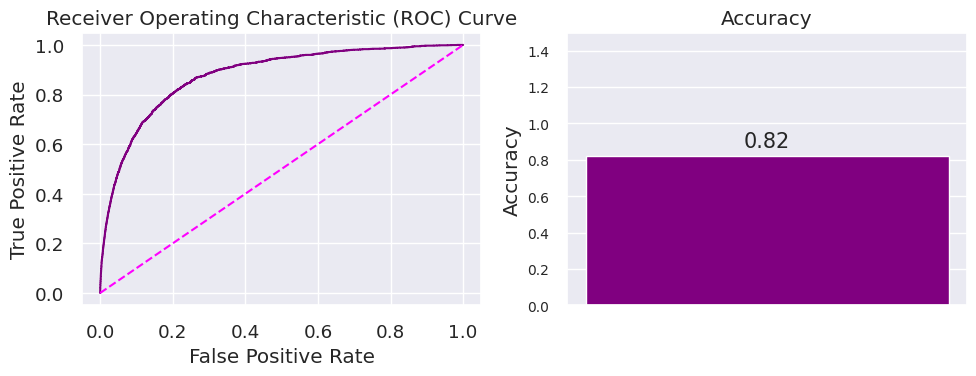

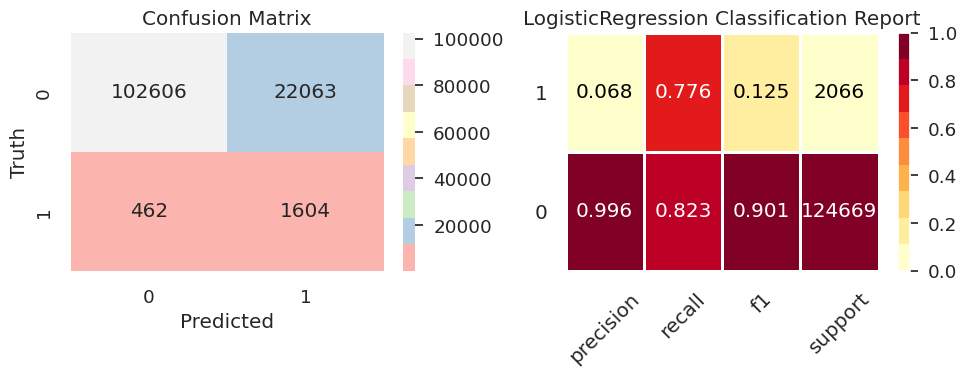

CPU times: user 16.2 s, sys: 4.55 s, total: 20.7 s
Wall time: 26.7 s


In [35]:
%%time
experiment.train(lr_model,param_grid=param_grid,search_type='random')

In [36]:
saved_model_path = experiment.save_model('step_2_lr.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_2_lr.pkl


## XGBoost Classifier:

Use the best hyperparameters found for XGboost at step 1 as the improvement was significant

In [37]:
# Define the parameter grid for XGBoost
param_grid = {
'scale_pos_weight':[89.67005],
'n_estimators': [200],
'max_depth': [3],
'learning_rate': [0.1]
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'scale_pos_weight': 89.67005, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Best estimator: XGBClassifier(n_estimators=200, random_state=42, scale_pos_weight=89.67005)
Best score: 0.8871239340679156
AUC: 0.8839076367929926
TPR:  52.080000000000005% 
FPR:  5.0% 
Threshold:  0.81
Predictive Equality:  91.38%


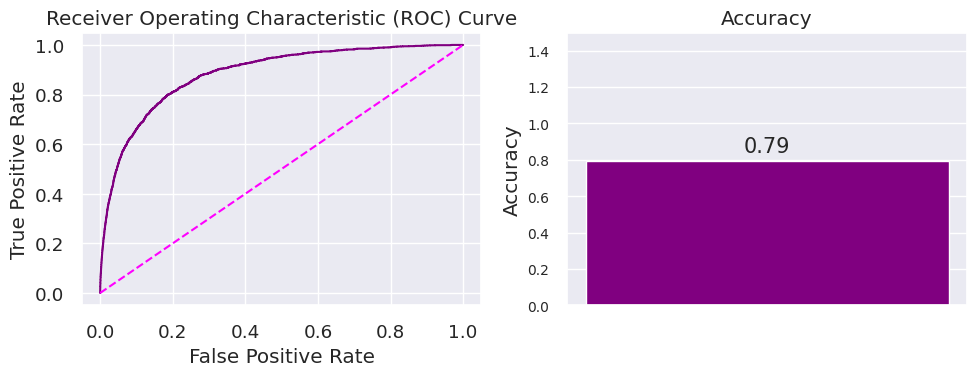

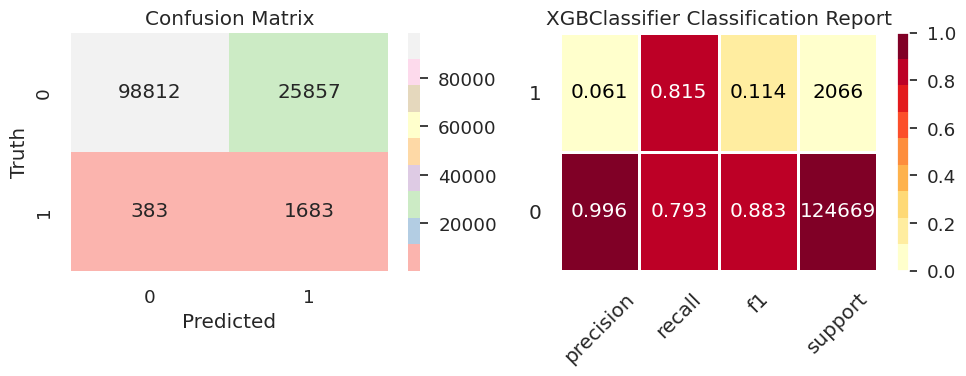

CPU times: user 3min 46s, sys: 1.62 s, total: 3min 48s
Wall time: 6min 47s


In [38]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

In [39]:
saved_model_path = experiment.save_model('step_2_xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_2_xgboost.pkl


## Random Forest:

In [40]:
# parameter grid for random forest we'll default parameters except for class weight
param_grid={
    "class_weight":['balanced']
}
# Random Forest model
random_forest_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced')
Best score: 0.8206875573202252
AUC: 0.8133481835505452
TPR:  40.27% 
FPR:  4.5% 
Threshold:  0.05
Predictive Equality:  37.47%


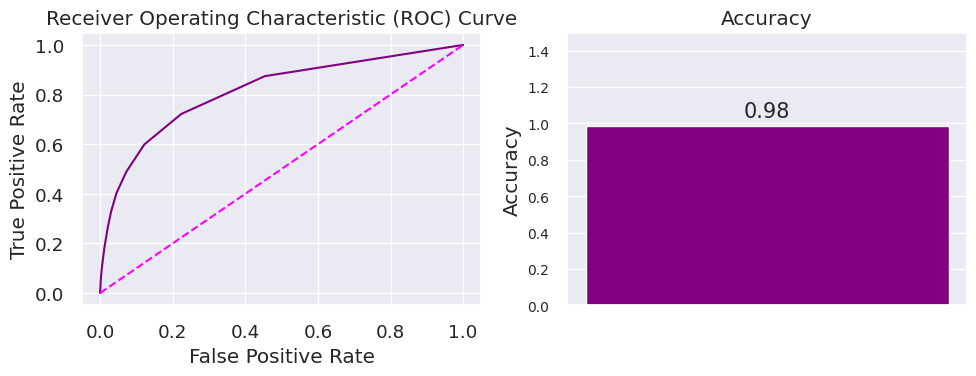

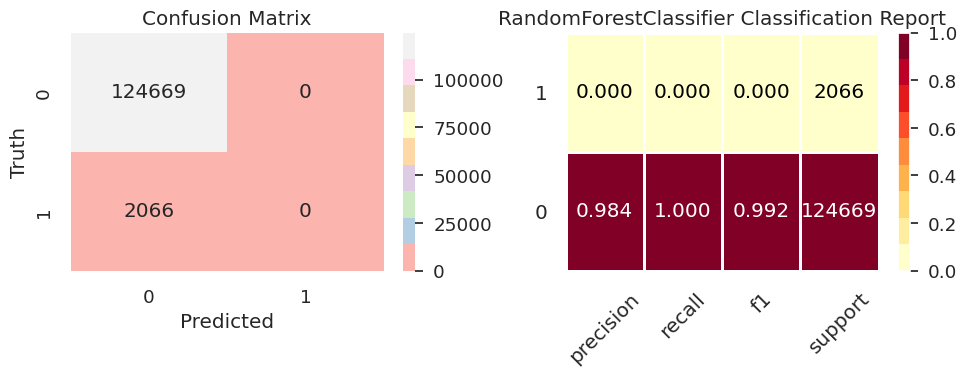

CPU times: user 2min 47s, sys: 1.35 s, total: 2min 49s
Wall time: 4min 44s


In [41]:
%%time
experiment.train(random_forest_model,param_grid=param_grid,search_type='random')

In [42]:
saved_model_path = experiment.save_model('step_2_randomforest.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_2_randomforest.pkl


## Keras Neural Network Model

Use model 6 from step-1 as it has improved the performnace compared by baseline nn model

In [52]:
# Keras model using dropout and batch normalization
nn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
nn_experiment = nn_modeling(nn_model, X_train,X_test,y_train,y_test,train_groups,test_groups)

In [54]:
%%time
hist = nn_experiment.compile_and_train(lr = 1e-2)

Epoch 1/100
770/770 [==============================] - 18s 17ms/step - loss: 0.9854 - fn: 1001.0000 - fp: 96292.0000 - tn: 292405.0000 - tp: 4294.0000 - precision: 0.0427 - recall: 0.8110 - f1: 0.0833 - val_loss: 0.5123 - val_fn: 0.0000e+00 - val_fp: 12015.0000 - val_tn: 31762.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
770/770 [==============================] - 9s 12ms/step - loss: 0.9404 - fn: 929.0000 - fp: 92219.0000 - tn: 296478.0000 - tp: 4366.0000 - precision: 0.0452 - recall: 0.8246 - f1: 0.0861 - val_loss: 0.6690 - val_fn: 0.0000e+00 - val_fp: 15498.0000 - val_tn: 28279.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
770/770 [==============================] - 12s 16ms/step - loss: 0.9179 - fn: 874.0000 - fp: 93233.0000 - tn: 295464.0000 - tp: 4421.0000 - precision: 0.0453 - recall: 0.8349 - f1: 0.0862 - val_loss: 0.7489 - val_fn: 0.0000e+00 - val_

3961/3961 [==============================] - 7s 2ms/step
AUC: 0.8779918439904957
TPR:  49.66% 
FPR:  5.0% 
Threshold:  0.89
Predictive Equality:  97.11%


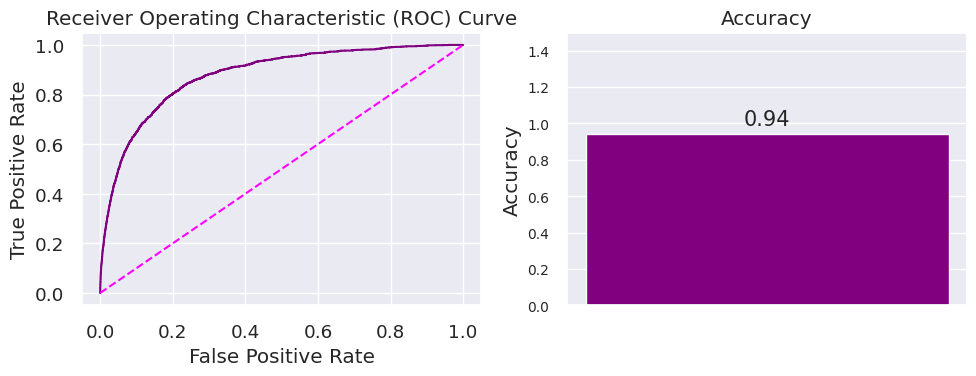

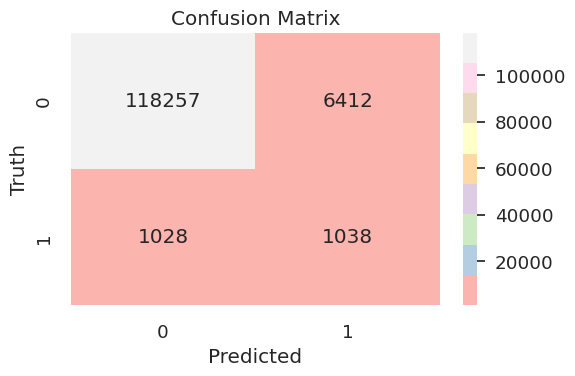

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    124669
           1       0.14      0.50      0.22      2066

    accuracy                           0.94    126735
   macro avg       0.57      0.73      0.59    126735
weighted avg       0.98      0.94      0.96    126735



In [55]:
nn_experiment.score_keras_model()

In [56]:
saved_model_path = nn_experiment.save_model('step_2_nn_model.h5')
print("Model saved at:", saved_model_path)

Model saved at: step_2_nn_model.h5


## AdaBoost

For this model we'll pass the default parameters

In [43]:
from sklearn.ensemble import AdaBoostClassifier
# parameter grid for AdaBoost
param_grid = {
}
# AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: AdaBoostClassifier(random_state=42)
Best score: 0.8856403151478869
AUC: 0.8843910524051231
TPR:  52.03% 
FPR:  4.99% 
Threshold:  0.49
Predictive Equality:  100.0%


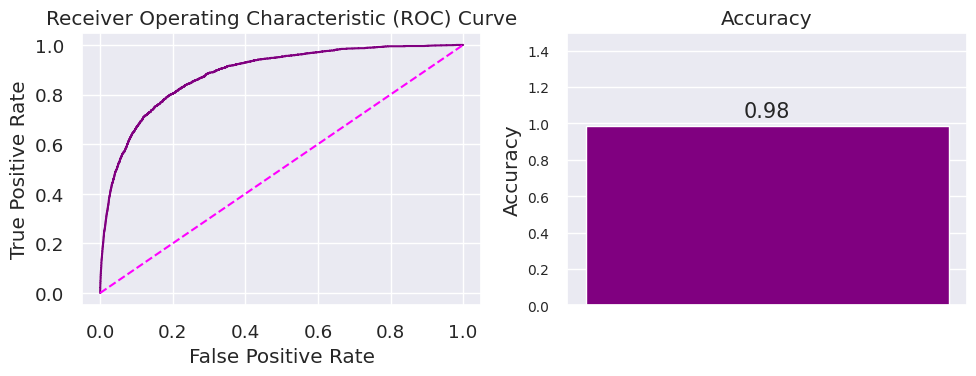

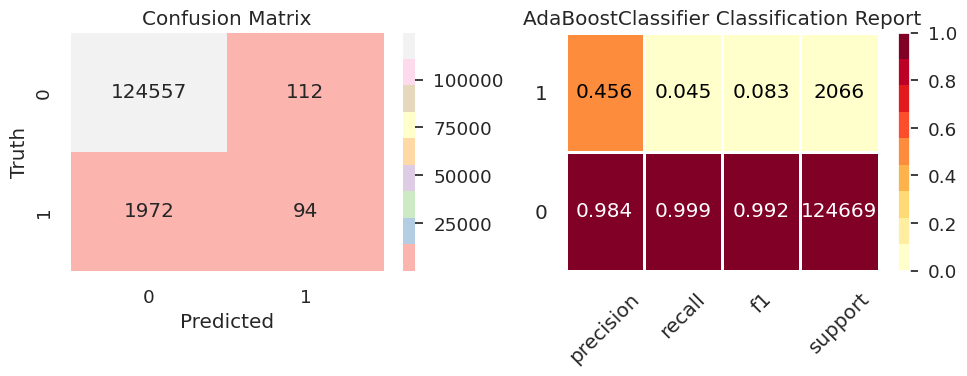

CPU times: user 1min 25s, sys: 841 ms, total: 1min 26s
Wall time: 2min 28s


In [44]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [45]:
saved_model_path = experiment.save_model('step_2_adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_2_adaboost.pkl


## CatBoost

In [47]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.5 MB/s eta 0:00:00


In [48]:
import catboost as cb

param_grid={}

catboost_model = cb.CatBoostClassifier(
    iterations=100,             # Number of trees to train (Default=500)
    learning_rate=0.1,          # (Default =0.009)
    depth=6,                    # Depth of the trees (Default)
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,
    verbose=False
)

In [49]:
catboost_experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups,name='catboost')

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x7b79bcd685b0>
Best score: 0.8878346420684571
AUC: 0.8849791343314464
TPR:  52.71% 
FPR:  4.97% 
Threshold:  0.05
Predictive Equality:  31.11%


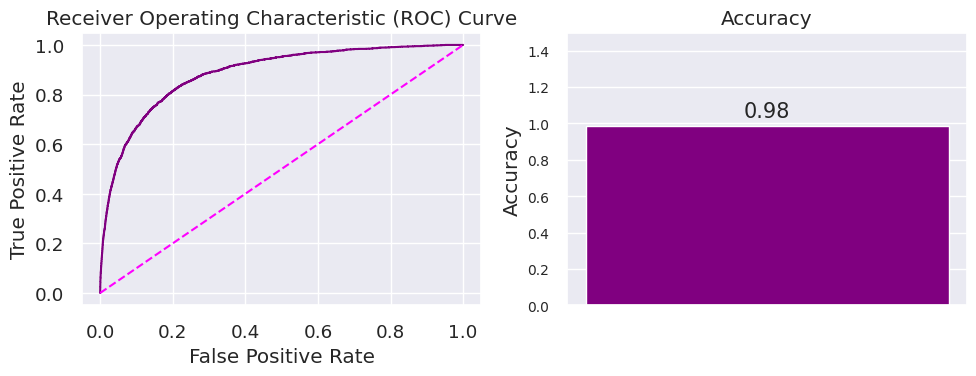

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    124669
           1       0.55      0.02      0.04      2066

    accuracy                           0.98    126735
   macro avg       0.77      0.51      0.52    126735
weighted avg       0.98      0.98      0.98    126735

CPU times: user 23.6 s, sys: 1.11 s, total: 24.8 s
Wall time: 35.2 s


In [50]:
%%time
catboost_experiment.train(catboost_model,param_grid=param_grid,search_type='random')

In [51]:
saved_model_path = catboost_experiment.save_model('step_2_catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_2_catboost.pkl


# 7- Conclusion

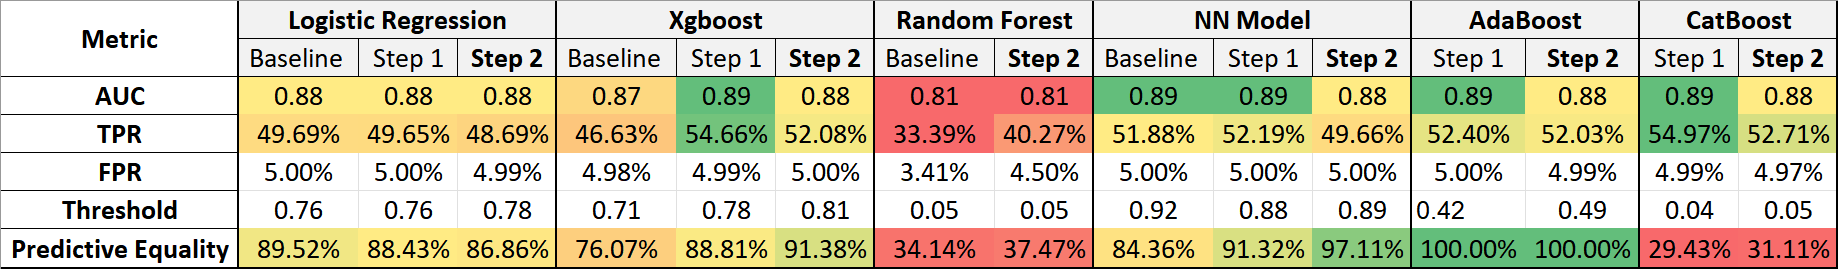

*Green: Highest*

*Red: Lowest*

Recall that the best Model of Step 1 was the XGBoost here on Step 2 level the best model is AdaBoost.

Best model is determined by the balance between AUC, TPR and Predictive Equality (fairness)

In this trial of **Step 2** several pre-processing steps were done which are listed below:
* Nulls imputation
* Outliers deletion
* Scaling numerical features using "Standard Scaler"
* Encoding the categorical features using "One-hot-encoder"


**Summary of Training**

* Logistic Regression
    *   We see that after applying the pre-processing the model AUC is not affected compared by the Baseline model or Step 1 model however the TPR and the Predictive Equlaity has decreased


* XGBoost
    *   After applying the pre-processing the model is better than the Baseline model in all metrics however when compared by Step 1 model we see that the AUC and TPR has decreased by not significantly

* Random Forest
    *   The model performance has improved by applying the pre-processing but it is still the worst model


* NN Model
    *   Applying the preprocessing has decreased the model AUC and TPR compared by the Baseline or Step 1 model but not significantly


* AdaBoost
    *   The results are approximately constant


* CatBoost
    *   The results are approximately constant


Best Models in Fairness: AdaBoost, NN Model, XGBoost while the worst is the CatBoost and Random Forest

Best Models in TPR: XGBoost and CatBoost while the worst is the Random Forest

For AUC all models have a comparable performance

# 8- Tuning the Best Model

Since AdaBoost was the best model we will tune its hyperparameters again for this kind of preprocessing and check the performance

In [39]:
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

In [41]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'n_estimators': [50, 75, 100],
    'learning_rate': [0.5, 1.0, 3] # weight applied to each boosting iteration
}
adaboost_model_2 = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
Best hyperparameters: {'n_estimators': 100, 'learning_rate': 0.5}
Best estimator: AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)
Best score: 0.8889714435823477
AUC: 0.8866406841638053
TPR:  52.900000000000006% 
FPR:  4.99% 
Threshold:  0.48
Predictive Equality:  100.0%


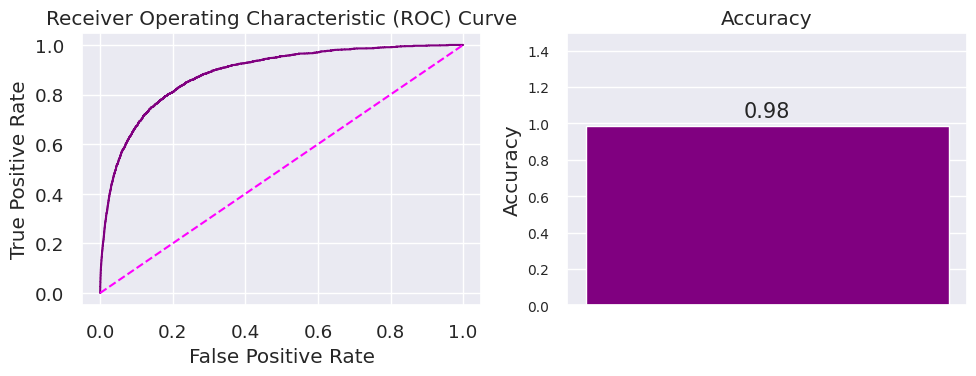

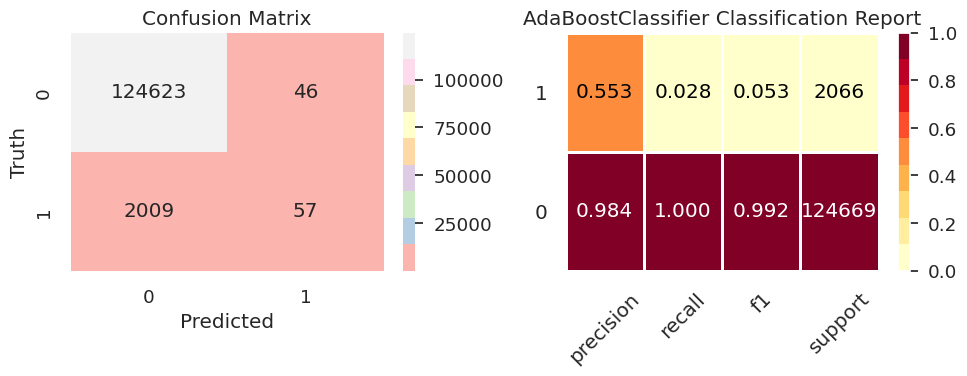

CPU times: user 4min 29s, sys: 4.17 s, total: 4min 33s
Wall time: 22min 25s


In [42]:
%%time
experiment.train(adaboost_model_2,
                 param_grid=param_grid,
                 search_type='random')

In [43]:
saved_model_path = experiment.save_model('step_2_adaboost_retuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_2_adaboost_retuning.pkl


We can notice that the TPR has improved compared by Step1 and Step 2 models after tuning the hyperparameters while the AUC and Predictive Equality remained approximately good and constant